In [1]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cmocean.cm as cm

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

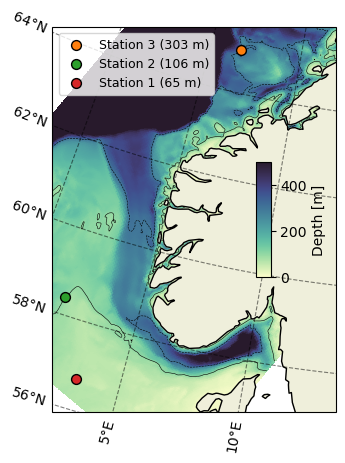

In [2]:
# Read depth data from the NorShelf dataset
data_url = 'https://thredds.met.no/thredds/dodsC/sea_norshelf_files/norshelf_qck_ZDEPTHS_fc_latest.nc'

with xr.open_dataset(data_url) as ds:

    # Set up map with Polar Stereographic projection
    map_proj = ccrs.NorthPolarStereo(central_longitude=20)
    fig, ax = plt.subplots(figsize=(7,5), subplot_kw=dict(projection=map_proj))

    # Plot bathymetry
    m = ax.pcolormesh(ds.lon, ds.lat, ds.h, 
                    transform=ccrs.PlateCarree(), cmap=cm.deep, vmin=0, vmax=500)

    # Plot 100 and 300 m depth contours
    cs = ax.contour(ds.lon, ds.lat, ds.h, 
                    transform=ccrs.PlateCarree(), colors='k', levels=[100], linestyles='-', linewidths=0.4, 
                    alpha=1, zorder=1)
    
    cs = ax.contour(ds.lon, ds.lat, ds.h, 
                    transform=ccrs.PlateCarree(), colors='k', levels=[300], linestyles='--', linewidths=0.4, 
                    alpha=1, zorder=1)
    
    # Add colorbar on top of map
    cax = ax.inset_axes([0.72, 0.35, 0.05, 0.3])
    plt.colorbar(m, cax=cax, label='Depth [m]')
    
    # Get ocean, land and coastline shapes, add to map
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='face',facecolor=cfeature.COLORS['land'])
    ax.add_feature(land_50m, zorder=1)
    ax.coastlines('50m')
    
    ax.scatter(6.67, 65.0, s=50, c='tab:orange', ec='k', label='Station 3 (303 m)', transform=ccrs.PlateCarree())
    ax.scatter(1.72, 58.4, s=50, c='tab:green', ec='k', label='Station 2 (106 m)', transform=ccrs.PlateCarree())
    ax.scatter(3.20, 56.7, s=50, c='tab:red', ec='k', label='Station 1 (65 m)',  transform=ccrs.PlateCarree())
    ax.legend(loc='upper left', fontsize=9)
    
    # Add lat-lon gridlines with labels
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='k', linestyle='--', alpha=0.5)
    gl.xlocator = mpl.ticker.FixedLocator(range(-90, 120, 5))
    gl.ylocator = mpl.ticker.FixedLocator(range(0, 90, 2))
    gl.top_labels = False
    gl.right_labels = False
    
    ax.set_extent([2, 12, 57, 65])
    #plt.savefig('map.png', dpi=240, bbox_inches='tight')